# EDA Example
对Springleaf数据集进行数据清洗

In [1]:
# 基础库
# 前两行画图
%matplotlib inline
import matplotlib.pyplot as plt

# 数据处理
import numpy as np
import pandas as pd

# 系统库
import os, sys

# 自带数据
datalib_path = os.path.join(os.path.abspath('.'), '../')
sys.path.append(datalib_path)
import dataset

# 忽略warning
import warnings
warnings.filterwarnings('ignore')

# import seaborn

In [2]:
def autolabel(arrayA):
    ''' label each colored square with the corresponding data value. 
    If value > 20, the text is in black, else in white.
    '''
    arrayA = np.array(arrayA)
    for i in range(arrayA.shape[0]):
        for j in range(arrayA.shape[1]):
                plt.text(j,i, "%.2f"%arrayA[i,j], ha='center', va='bottom',color='w')

def hist_it(feat):
    plt.figure(figsize=(16,4))
    feat[Y_train==0].hist(bins=range(int(feat.min()),int(feat.max()+2)),normed=True,alpha=0.8)
    feat[Y_train==1].hist(bins=range(int(feat.min()),int(feat.max()+2)),normed=True,alpha=0.5)
    plt.ylim((0,1))
    
def gt_matrix(feats,sz=16):
    a = []
    for i,c1 in enumerate(feats):
        b = [] 
        for j,c2 in enumerate(feats):
            mask = (~X_train[c1].isnull()) & (~X_train[c2].isnull())
            if i>=j:
                b.append((X_train.loc[mask,c1].values>=X_train.loc[mask,c2].values).mean())
            else:
                b.append((X_train.loc[mask,c1].values>X_train.loc[mask,c2].values).mean())

        a.append(b)

    plt.figure(figsize = (sz,sz))
    plt.imshow(a, interpolation = 'None')
    _ = plt.xticks(range(len(feats)),feats,rotation = 90)
    _ = plt.yticks(range(len(feats)),feats,rotation = 0)
    autolabel(a)

In [3]:
def hist_it1(feat):
    plt.figure(figsize=(16,4))
    feat[Y==0].hist(bins=100,range=(feat.min(),feat.max()),normed=True,alpha=0.5)
    feat[Y==1].hist(bins=100,range=(feat.min(),feat.max()),normed=True,alpha=0.5)
    plt.ylim((0,1))

In [4]:
# 载入数据
# 需要2分钟
train_raw = pd.read_csv(os.path.join(dataset.springleaf_path, 'train.csv.zip'))
train_target_raw = train_raw.target
train_raw.head()

,ID,VAR_0001,VAR_0002,VAR_0003,VAR_0004,VAR_0005,VAR_0006,VAR_0007,VAR_0008,VAR_0009,...,VAR_1926,VAR_1927,VAR_1928,VAR_1929,VAR_1930,VAR_1931,VAR_1932,VAR_1933,VAR_1934,target
0,2,H,224,0,4300,C,0.0,0.0,False,False,...,98,98,998,999999998,998,998,9998,9998,IAPS,0
1,4,H,7,53,4448,B,1.0,0.0,False,False,...,98,98,998,999999998,998,998,9998,9998,IAPS,0
2,5,H,116,3,3464,C,0.0,0.0,False,False,...,98,98,998,999999998,998,998,9998,9998,IAPS,0
3,7,H,240,300,3200,C,0.0,0.0,False,False,...,98,98,998,999999998,998,998,9998,9998,RCC,0
4,8,R,72,261,2000,N,0.0,0.0,False,False,...,98,98,998,999999998,998,998,9998,9998,BRANCH,1


In [5]:
# 需要2分钟
test_raw = pd.read_csv(os.path.join(dataset.springleaf_path, 'test.csv.zip'))
test_ID = test_raw.ID
test_raw.head()

,ID,VAR_0001,VAR_0002,VAR_0003,VAR_0004,VAR_0005,VAR_0006,VAR_0007,VAR_0008,VAR_0009,...,VAR_1925,VAR_1926,VAR_1927,VAR_1928,VAR_1929,VAR_1930,VAR_1931,VAR_1932,VAR_1933,VAR_1934
0,1,R,360,25,2251,B,2.0,2.0,False,False,...,0,98,98,998,999999998,998,998,9998,9998,IAPS
1,3,R,74,192,3274,C,2.0,3.0,False,False,...,0,98,98,998,999999998,998,998,9998,9998,IAPS
2,6,R,21,36,3500,C,1.0,1.0,False,False,...,0,98,98,998,999999998,998,998,9998,9998,IAPS
3,9,R,8,2,1500,B,0.0,0.0,False,False,...,0,98,98,998,999999998,998,998,9998,9998,IAPS
4,10,H,91,39,84500,C,8.0,3.0,False,False,...,0,98,98,998,999999998,998,998,9998,9998,IAPS


In [6]:
# 数据规模
# 行数，列数
print('Train shape', train_raw.shape)
print('Test shape', test_raw.shape)

Train shape (145231, 1934)
Test shape (145232, 1933)


In [7]:
# 压缩规模，取前5000条和前1000条
X_train = train_raw[:5000]
Y_train = train_raw.target[0:5000]
X_test = test_raw[:1000]

In [8]:
# 列出所有含有null值的行
X_train.isnull().sum(axis=1).head(15)  

0     25
1     19
2     24
3     24
4     24
5     24
6     24
7     24
8     16
9     24
10    22
11    24
12    17
13    24
14    24
dtype: int64

In [9]:
# 列出所有含有null值的列
X_train.isnull().sum(axis=0).head(15)  

ID          0
VAR_0001    0
VAR_0002    0
VAR_0003    0
VAR_0004    0
VAR_0005    0
VAR_0006    0
VAR_0007    0
VAR_0008    0
VAR_0009    0
VAR_0010    0
VAR_0011    0
VAR_0012    0
VAR_0013    0
VAR_0014    0
dtype: int64

### 数据清洗
通过对数据的分析，删除无用的列和行

In [10]:
# 将训练集和测试集统一处理
X_train['is_train'] = 1
X_test['is_train'] = 0

# 利用concat将两个数据集合起来
# 注意OOM，concat函数会复制数据，内存占用会变成之前的两倍
X_traintest = pd.concat([X_train, X_test], axis = 0)
X_traintest.shape

(6000, 1935)

In [11]:
# 统计每个特征的值
# `dropna = False` makes nunique treat NaNs as a distinct value
feats_counts = X_train.nunique(dropna = False)  
 # 列出只有一个值的列
feats_counts.sort_values()[:10] 

is_train    1
VAR_0038    1
VAR_0039    1
VAR_0040    1
VAR_0223    1
VAR_0042    1
VAR_0043    1
VAR_0044    1
VAR_0188    1
VAR_0189    1
dtype: int64

In [12]:
# 找到全部的唯一值的列
# 他们对于modeling没有帮助
constant_features = [c for c in feats_counts.loc[feats_counts==1].index.tolist() if c != 'is_train']
print(constant_features)

['VAR_0008', 'VAR_0009', 'VAR_0010', 'VAR_0011', 'VAR_0012', 'VAR_0018', 'VAR_0019', 'VAR_0020', 'VAR_0021', 'VAR_0022', 'VAR_0023', 'VAR_0024', 'VAR_0025', 'VAR_0026', 'VAR_0027', 'VAR_0028', 'VAR_0029', 'VAR_0030', 'VAR_0031', 'VAR_0032', 'VAR_0038', 'VAR_0039', 'VAR_0040', 'VAR_0041', 'VAR_0042', 'VAR_0043', 'VAR_0044', 'VAR_0106', 'VAR_0188', 'VAR_0189', 'VAR_0190', 'VAR_0191', 'VAR_0192', 'VAR_0193', 'VAR_0196', 'VAR_0197', 'VAR_0199', 'VAR_0202', 'VAR_0203', 'VAR_0207', 'VAR_0213', 'VAR_0214', 'VAR_0215', 'VAR_0216', 'VAR_0221', 'VAR_0222', 'VAR_0223', 'VAR_0229', 'VAR_0239', 'VAR_0840', 'VAR_0847', 'VAR_1428']


In [13]:
# 删除没用的列
# inplace是原位操作，节省内存，但是对原始数据有改动
X_traintest.drop(constant_features,axis = 1,inplace=True)
X_traintest.shape

(6000, 1883)

In [14]:
# 空值填充
X_train.fillna('NaN', inplace=True)

Now let's encode each feature, as we discussed. 

In [15]:
X_train['VAR_0002'].factorize()

(array([  0,   1,   2, ...,  28,  26, 274]),
 Int64Index([224,   7, 116, 240,  72,   4,  60,  13,  17,  24,
             ...
             235, 447, 369, 706, 500, 760, 497, 443, 481, 462],
            dtype='int64', length=456))

In [16]:
# 对每个列进行编码
# 生成mapping
X_train_enc = pd.DataFrame(index = X_train.index)
for col in X_traintest.columns:
    X_train_enc[col] = X_train[col].factorize()[0]

In [17]:
# 另外一种方式
# train_enc[col] = train[col].map(train[col].value_counts())

In [18]:
# The resulting data frame is very very large, so we cannot just transpose it and use .duplicated. That is why we will use a simple loop.
# 查找重复列
# 需要10分钟
dup_cols = {}

for i, c1 in enumerate(X_train_enc.columns):
    for c2 in X_train_enc.columns[i + 1:]:
        if c2 not in dup_cols and np.all(X_train_enc[c1] == X_train_enc[c2]):
            dup_cols[c2] = c1

In [19]:
# 重复列的mapping
dup_cols

{'VAR_0227': 'ID',
 'VAR_0228': 'ID',
 'VAR_0013': 'VAR_0006',
 'VAR_0201': 'VAR_0051',
 'VAR_0238': 'VAR_0089',
 'VAR_0114': 'VAR_0098',
 'VAR_0130': 'VAR_0098',
 'VAR_0115': 'VAR_0099',
 'VAR_0181': 'VAR_0180',
 'VAR_0182': 'VAR_0180',
 'VAR_0195': 'VAR_0194',
 'VAR_0210': 'VAR_0208',
 'VAR_0211': 'VAR_0208',
 'VAR_0394': 'VAR_0246',
 'VAR_0395': 'VAR_0246',
 'VAR_0396': 'VAR_0246',
 'VAR_0397': 'VAR_0246',
 'VAR_0398': 'VAR_0246',
 'VAR_0399': 'VAR_0246',
 'VAR_0411': 'VAR_0246',
 'VAR_0412': 'VAR_0246',
 'VAR_0438': 'VAR_0246',
 'VAR_0445': 'VAR_0246',
 'VAR_0446': 'VAR_0246',
 'VAR_0449': 'VAR_0246',
 'VAR_0459': 'VAR_0246',
 'VAR_0463': 'VAR_0246',
 'VAR_0526': 'VAR_0246',
 'VAR_0527': 'VAR_0246',
 'VAR_0528': 'VAR_0246',
 'VAR_0529': 'VAR_0246',
 'VAR_0530': 'VAR_0246',
 'VAR_0357': 'VAR_0260',
 'VAR_0512': 'VAR_0506',
 'VAR_0671': 'VAR_0669',
 'VAR_0672': 'VAR_0670',
 'VAR_1036': 'VAR_0916',
 'VAR_1628': 'VAR_1620',
 'VAR_1849': 'VAR_1844',
 'VAR_1846': 'VAR_1845',
 'VAR_1847':

In [20]:
# 该计算需要很长时间
# 可以保存起来，下次使用
# import pickle
# pickle.dump(dup_cols, open('dup_cols.p', 'wb'), protocol=pickle.HIGHEST_PROTOCOL)

In [21]:
# 删除重复列
X_traintest.drop(dup_cols.keys(), axis = 1,inplace=True)

In [22]:
# 唯一值统计
nunique = X_train.nunique(dropna=False)
nunique

ID          5000
VAR_0001       3
VAR_0002     456
VAR_0003     385
VAR_0004    1929
            ... 
VAR_1932      17
VAR_1933     154
VAR_1934       5
target         2
is_train       1
Length: 1935, dtype: int64

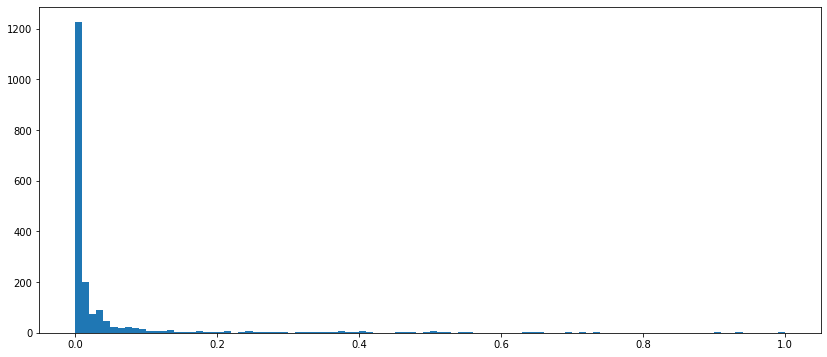

In [23]:
# 计算唯一值的数据占比
plt.figure(figsize=(14,6))
_ = plt.hist(nunique.astype(float)/X_train.shape[0], bins=100)

In [25]:
# 找到唯一值占比很大（即重复性少）的列
# 这些值基本都是整数，意味着他们是某种ID或者统计量（count）
mask = (nunique.astype(float)/X_train.shape[0] > 0.8)
X_train.loc[:, mask]

,ID,VAR_0212,VAR_0227,VAR_0228,VAR_0541,VAR_0543,VAR_0704,VAR_0887,VAR_0899,VAR_1081,VAR_1082,VAR_1087,VAR_1179,VAR_1180,VAR_1181,VAR_1495
0,2,NaN,311951.0,311951.0,49463,116783,25619,19214,112871,76857,76857,116783,76857,76857,76857,50000
1,4,9.20713e+10,2769488.0,2769488.0,303472,346196,28336,28336,346375,341365,341365,346196,341365,341365,176604,27542
2,5,2.65477e+10,654127.0,654127.0,94990,122601,35589,35589,121501,107267,107267,121501,107267,107267,58714,19238
3,7,7.75753e+10,3015088.0,3015088.0,20593,59490,5854,5204,61890,45794,47568,59490,45794,47568,47568,29182
4,8,6.04238e+10,118678.0,118678.0,10071,35708,2550,2266,34787,20475,23647,34708,20475,23647,23647,23932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,9725,3.20241e+10,2913739.0,2913739.0,50054,89996,16555,16555,92321,81099,81099,89996,81099,81099,42321,21348
4996,9730,NaN,1713017.0,1713017.0,227,1000,342,342,500,227,227,1000,227,227,227,2647
4997,9736,2.45404e+10,1564676.0,1564676.0,13943,15343,3844,3844,19193,14444,14959,15193,14444,14959,14959,13943
4998,9738,2.97304e+10,2400564.0,2400564.0,440,726,577,577,4290,505,505,726,505,505,505,440


In [27]:
# 再看一下重复率相对少的列
# These look like counts too. 
# First thing to notice is the 23th line: 99999.., -99999 values look like NaNs so we should probably built a related feature. 
# Second: the columns are sometimes placed next to each other, so the columns are probably grouped together and we can disentangle that.      
# 要注意的点：异常值（比如-99999或者+99999）可能代表着NaN或者缺失数据
mask = (nunique.astype(float)/X_train.shape[0] < 0.8) & (nunique.astype(float)/X_train.shape[0] > 0.4)
X_train.loc[:25, mask]

,VAR_0200,VAR_0241,VAR_0293,VAR_0313,VAR_0585,VAR_0609,VAR_0648,VAR_0649,VAR_0652,VAR_0705,...,VAR_1374,VAR_1489,VAR_1494,VAR_1496,VAR_1497,VAR_1801,VAR_1802,VAR_1809,VAR_1810,VAR_1859
0,FT LAUDERDALE,33324.0,0,0,48233,73627,999999997,999999996,999999996,49463,...,39926,999999997,999999997,999999997,999999997,49463,49463,30537,30537,999999997
1,SANTEE,92071.0,163400,163400,2407,3502,26051,2805,2625,798,...,2847,32597,33667,27542,11222,5296,5296,2847,2847,2684
2,REEDSVILLE,26547.0,0,0,999999997,999999997,10161,2116,7071,-99999,...,999999997,12277,22523,15452,11262,999999997,999999997,999999997,999999997,999999997
3,LIBERTY,77575.0,0,0,236,1903,20593,18802,29182,183,...,14,45508,59190,29182,9865,286,2060,14,14,1774
4,FRANKFORT,60423.0,0,0,6183,6693,10071,10071,20947,1918,...,3357,10071,20947,20947,20947,10404,13576,3357,3357,568
5,SPRING,77379.0,127200,127200,412,412,18877,1025,4000,692,...,88,19902,26755,22755,13378,1237,1237,88,88,999999998
6,GRESHAM,97030.0,252970,252970,999999996,999999996,5818,5818,23665,116,...,157,5818,23665,23665,23665,143,143,157,157,999999997
7,WARNER ROBINS,31098.0,0,0,999999996,999999996,2961,1015,1544,219,...,150,3976,4681,3137,2341,350,350,150,150,1365
8,SAN ANTONIO,78212.0,68120,0,999999996,999999996,20359,820,3048,412,...,308,23389,28314,21942,5663,1580,3739,308,308,5209
9,NORRISTOWN,19401.0,0,0,362,1127,999999996,999999996,999999996,-99999,...,118,999999996,999999996,999999996,999999996,1197,1197,118,118,815


In [28]:
# Our conclusion: there are no floating point variables, there are some counts variables, which we will treat as numeric. 
# And finally, let's pick one variable (in this case 'VAR_0015') from the third group of features.

X_train['VAR_0015'].value_counts()

0.0     3595
1.0      936
2.0      294
3.0       94
4.0       38
5.0       21
6.0       12
7.0        4
8.0        2
10.0       2
14.0       1
9.0        1
Name: VAR_0015, dtype: int64

In [29]:
# 把分类型和数值型的特征分别跳出来
cat_cols = list(X_train.select_dtypes(include=['object']).columns)
num_cols = list(X_train.select_dtypes(exclude=['object']).columns)
print(cat_cols)
print(num_cols)

['VAR_0001', 'VAR_0005', 'VAR_0044', 'VAR_0073', 'VAR_0074', 'VAR_0075', 'VAR_0156', 'VAR_0157', 'VAR_0158', 'VAR_0159', 'VAR_0166', 'VAR_0167', 'VAR_0168', 'VAR_0169', 'VAR_0176', 'VAR_0177', 'VAR_0178', 'VAR_0179', 'VAR_0200', 'VAR_0202', 'VAR_0204', 'VAR_0205', 'VAR_0206', 'VAR_0207', 'VAR_0208', 'VAR_0209', 'VAR_0210', 'VAR_0211', 'VAR_0212', 'VAR_0213', 'VAR_0214', 'VAR_0216', 'VAR_0217', 'VAR_0222', 'VAR_0237', 'VAR_0242', 'VAR_0243', 'VAR_0244', 'VAR_0245', 'VAR_0246', 'VAR_0247', 'VAR_0248', 'VAR_0249', 'VAR_0250', 'VAR_0251', 'VAR_0252', 'VAR_0253', 'VAR_0254', 'VAR_0255', 'VAR_0256', 'VAR_0257', 'VAR_0258', 'VAR_0259', 'VAR_0260', 'VAR_0261', 'VAR_0262', 'VAR_0263', 'VAR_0264', 'VAR_0265', 'VAR_0266', 'VAR_0267', 'VAR_0268', 'VAR_0269', 'VAR_0270', 'VAR_0271', 'VAR_0272', 'VAR_0273', 'VAR_0274', 'VAR_0275', 'VAR_0276', 'VAR_0277', 'VAR_0278', 'VAR_0279', 'VAR_0280', 'VAR_0281', 'VAR_0282', 'VAR_0283', 'VAR_0284', 'VAR_0285', 'VAR_0286', 'VAR_0287', 'VAR_0288', 'VAR_0289', 'VA

In [30]:
# 异常值处理
# 先统一替换
X_train.replace('NaN', -999, inplace=True)

Let's calculate how many times one feature is greater than the other and create cross tabel out of it. 

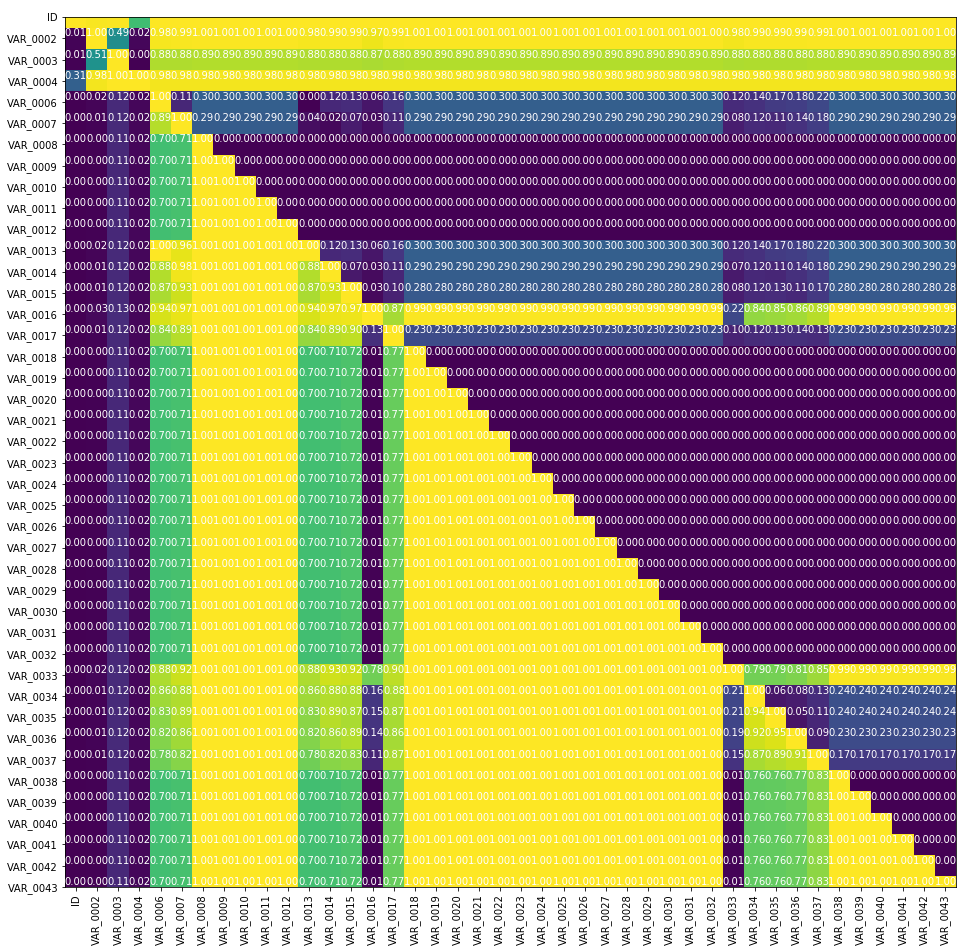

In [31]:
# select first 42 numeric features
feats = num_cols[:42]

# build 'mean(feat1 > feat2)' plot
gt_matrix(feats,16)

# 有一些列是很相似的

# Indeed, we see interesting patterns here. 
# There are blocks of geatures where one is strictly greater than the other. 
# So we can hypothesize, that each column correspondes to cumulative counts, 
# e.g. feature number one is counts in first month, 
# second -- total count number in first two month and so on. 
# So we immediately understand what features we should generate to make tree-based models more efficient: 
# the differences between consecutive values.

(-10, 1010)

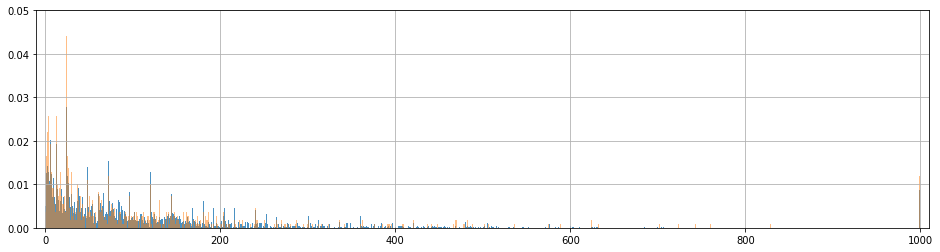

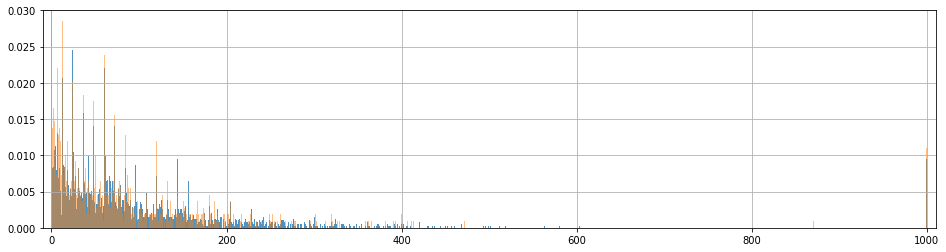

In [32]:
## VAR_0002, VAR_0003 

hist_it(X_train['VAR_0002'])
plt.ylim((0,0.05))
plt.xlim((-10,1010))

hist_it(X_train['VAR_0003'])
plt.ylim((0,0.03))
plt.xlim((-10,1010))

In [33]:
X_train['VAR_0002'].value_counts()

12     167
24     157
36     129
13     103
60     103
      ... 
828      1
760      1
704      1
684      1
235      1
Name: VAR_0002, Length: 456, dtype: int64

In [37]:
X_train['VAR_0003'].value_counts()
# We see there is something special about 12, 24 and so on, sowe can create another feature x mod 12. 

0      568
24     118
12     112
60     112
36      82
      ... 
371      1
385      1
397      1
603      1
405      1
Name: VAR_0003, Length: 385, dtype: int64

(0, 0.6)

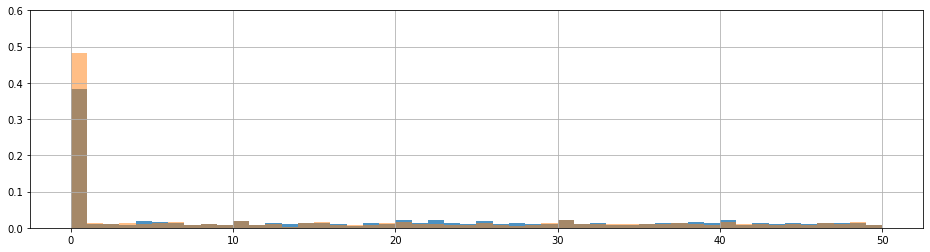

In [38]:
## VAR_0004

X_train['VAR_0004_mod50'] = X_train['VAR_0004'] % 50
hist_it(X_train['VAR_0004_mod50'])
plt.ylim((0,0.6))

In [39]:
# 分类型特征
X_train.loc[:,cat_cols].head().T

,0,1,2,3,4
VAR_0001,H,H,H,H,R
VAR_0005,C,B,C,C,N
VAR_0044,[],[],[],[],[]
VAR_0073,-999,04SEP12:00:00:00,-999,-999,-999
VAR_0074,-999,5208,-999,-999,-999
...,...,...,...,...,...
VAR_0529,0,0,0,0,0
VAR_0530,-1,-1,-1,-1,-1
VAR_0531,201111,201210,201112,201210,201110
VAR_0840,-999,-999,-999,-999,-999


In [41]:
for c in cat_cols:
    print(c)
    print(X_train[c].value_counts())

VAR_0001
R    2874
H    2113
Q      13
Name: VAR_0001, dtype: int64
VAR_0005
B    2498
C    1884
N     540
S      78
Name: VAR_0005, dtype: int64
VAR_0044
[]    5000
Name: VAR_0044, dtype: int64
VAR_0073
-999                3546
11SEP12:00:00:00       9
25NOV11:00:00:00       7
06JUL12:00:00:00       7
13MAR09:00:00:00       7
                    ... 
16AUG10:00:00:00       1
13JUN12:00:00:00       1
20JUL10:00:00:00       1
23MAR11:00:00:00       1
27SEP10:00:00:00       1
Name: VAR_0073, Length: 677, dtype: int64
VAR_0074
-999.0     3546
 2500.0      98
 2000.0      80
 3000.0      76
 1500.0      57
           ... 
 2900.0       1
 7842.0       1
 1962.0       1
 2060.0       1
 7583.0       1
Name: VAR_0074, Length: 518, dtype: int64
VAR_0075
22SEP10:00:00:00    53
23SEP10:00:00:00    34
07DEC11:00:00:00    34
08NOV11:00:00:00    28
23NOV11:00:00:00    27
                    ..
09FEB06:00:00:00     1
15OCT10:00:00:00     1
16FEB11:00:00:00     1
29JUN09:00:00:00     1
05FEB12:00:00

In [50]:
# VAR_0073 是日期
# 日期转换
pd.to_datetime(X_train['VAR_0073'],format = '%d%b%y:%H:%M:%S', errors='coerce')

0             NaT
1      2012-09-04
2             NaT
3             NaT
4             NaT
          ...    
4995          NaT
4996          NaT
4997          NaT
4998          NaT
4999          NaT
Name: VAR_0073, Length: 5000, dtype: datetime64[ns]